In [2]:
!pip install torch

   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/110.9 MB 8.9 MB/s eta 0:00:13
   - -------------------------------------- 5.0/110.9 MB 16.8 MB/s eta 0:00:07
   ---- ----------------------------------- 11.3/110.9 MB 22.7 MB/s eta 0:00:05
   ------ --------------------------------- 17.0/110.9 MB 24.3 MB/s eta 0:00:04
   -------- ------------------------------- 24.4/110.9 MB 26.4 MB/s eta 0:00:04
   ----------- ---------------------------- 31.5/110.9 MB 27.8 MB/s eta 0:00:03
   ------------- -------------------------- 37.5/110.9 MB 27.6 MB/s eta 0:00:03
   ---------------- ----------------------- 44.6/110.9 MB 28.2 MB/s eta 0:00:03
   ------------------ --------------------- 51.4/110.9 MB 28.7 MB/s eta 0:00:03
   -------------------- ------------------- 57.9/110.9 MB 29.1 MB/s eta 0:00:02
   ----------------------- ---------------- 64.7/110.9 MB 29.6 MB/s eta 0:00:02
   ------------------------- -------------- 72.1/110

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

In [2]:
# CELL ĐẦU TIÊN – CHẠY 1 LẦN DUY NHẤT
import sys
from pathlib import Path

# BÂY GIỜ IMPORT NGON LÀNH
from xuLyDuLieu.fcae import extract_features, FCAE, FeaturesDataset

print("Import thành công! Bạn có thể dùng FCAE và FeaturesDataset rồi đấy!")

ModuleNotFoundError: No module named 'xuLyDuLieu'

# Lấy dữ liệu

In [4]:
# lấy từ file data\FPT_detail_2013_01_01_2024_12_31.csv
import pandas as pd
from pathlib import Path

# Xây đường dẫn tương đối so với thư mục notebook này (training/)
data_file = Path('..') / 'data' / 'FPT_detail_2013_01_01_2024_12_31.csv'

if not data_file.exists():
    raise FileNotFoundError(f"Không tìm thấy tập tin: {data_file.resolve()}")

# Đọc file CSV vào biến price_history (phân tích cột 'Date' nếu có)
try:
    price_history = pd.read_csv(data_file, parse_dates=['Date'], dayfirst=False)
except ValueError:
    # Nếu không có cột 'Date', đọc bình thường và giữ nguyên dữ liệu
    price_history = pd.read_csv(data_file)

# Sắp theo cột 'Date' nếu có và đặt lại index để DataFrame gọn gàng
if 'Date' in price_history.columns:
    price_history = price_history.sort_values('Date').reset_index(drop=True)

# Xem nhanh (bỏ hoặc comment dòng này khi không cần)
price_history.head()


,time,open,high,low,close,volume
0,20-06-2012,5.31,5.31,5.27,5.29,89720
1,21-06-2012,5.28,5.29,5.26,5.28,50360
2,22-06-2012,5.27,5.28,5.26,5.26,67350
3,25-06-2012,5.25,5.29,5.25,5.26,42840
4,26-06-2012,5.22,5.24,5.22,5.22,31110


100%|██████████| 100/100 [00:13<00:00,  7.28it/s]



Last Loss 2.917922019958496


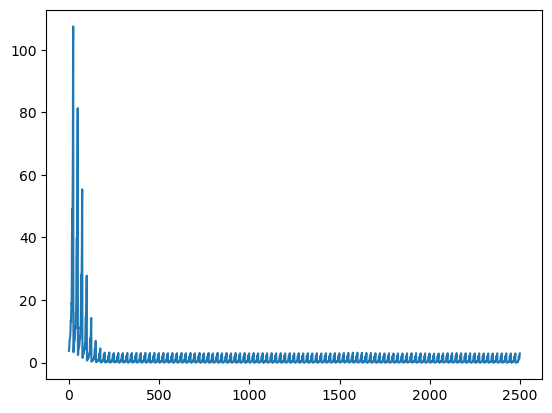